In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Game import *
from RobotSim373 import *

Version:  0.2.35
Version:  0.0.46


In [3]:
from TTT import *

TTT Version: 0.0.3


## take at least 20 pics of your board in various mid-game positions.

In [4]:
def take_picture(t,robot):
    from time import time
    timestr=str(time()).replace(".","_")
    image_filename=f'images/ttt pics/ttt_robot_{timestr}.jpeg'
    robot.take_picture(image_filename)
    robot.image_filename=image_filename  # save the last name
    
    return True    


def random_TTT_game_state():
    Q=LoadTable('../Sprint #2 - Learning and Simulation/2021-10-18 TTT Q1.json')    
    keys=list(Q.keys())
    state=Board(3,3)
    state.board=random.choice(keys)
    return state
    
state_machine=StateMachine(
    (take_picture,"_end_simulation"),
)
    


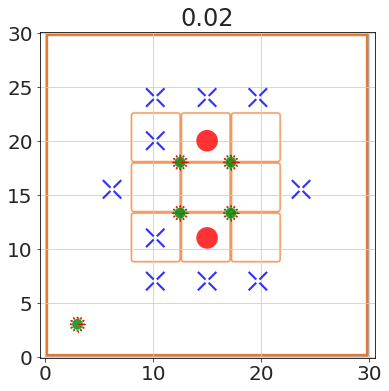

In [33]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

state=random_TTT_game_state()
set_up_board(env,state)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )



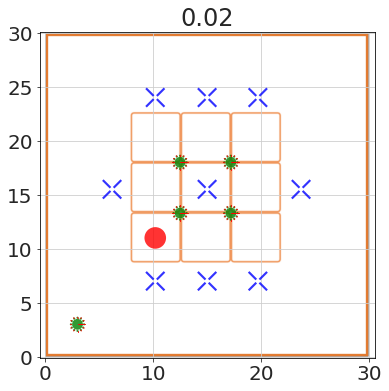

In [11]:
for i in range(30):
    env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
    robot=Robot(env)
    build(robot)
    robot.controller=Controller(state_machine)
    robot.controller.monitor=monitor

    state=random_TTT_game_state()
    set_up_board(env,state)

    run_sim(env,robot.controller, 
            figure_width=6,
           total_time=100,
           dt_display=0.1,  # make this larger for a faster display
           )

    

## show how to slice the image into its individual playing squares

In [5]:
fname='images/ttt pics/random board pics/ttt_robot_1637076443_4151511.jpeg'

(432, 432, 3)

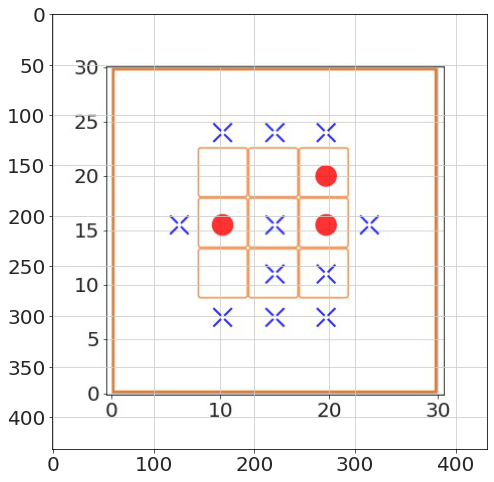

In [6]:
im=imread(fname)
imshow(im)
im.shape

### select the board out of this

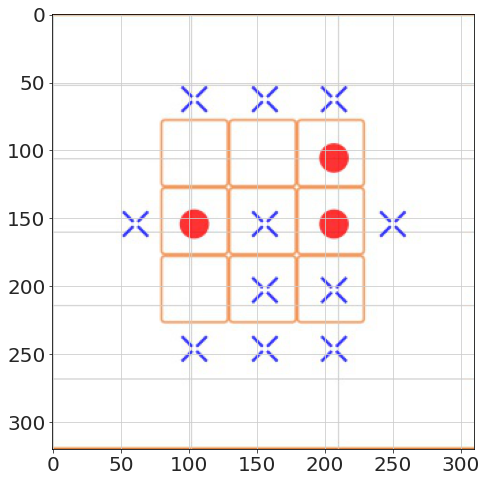

In [7]:
board_im=im[55:375,65:375]
imshow(board_im)

### select sub-squares

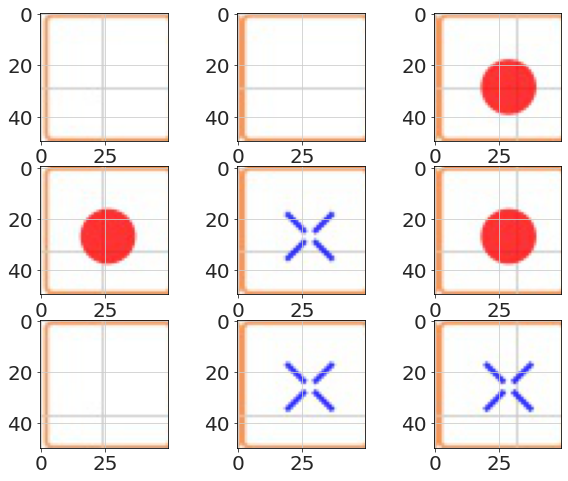

In [8]:
start_row=77
start_col=79
sub_image_rows=50
sub_image_cols=50

start_row=77
start_col=78
sub_image_rows=50
sub_image_cols=50



count=1
for r in range(3):
    for c in range(3):
        sub_image=board_im[ (start_row+sub_image_rows*r):(start_row+sub_image_rows*(r+1)) , 
                      (start_col+sub_image_cols*c):(start_col+sub_image_cols*(c+1))  ,
                      :]  # all the channels
        
        subplot(3,3,count)
        imshow(sub_image)
        count+=1

## write a function which takes a board image and the row,col of a square and returns the sub-image of that square

In [8]:
def board_square_image(im,r,c):
    if isinstance(im,str):
        im=imread(im)
        
    board_im=im[55:375,65:375]    
    
    
    start_row=77
    start_col=79
    sub_image_rows=50
    sub_image_cols=50

    sub_image=board_im[ (start_row+sub_image_rows*r):(start_row+sub_image_rows*(r+1)) , 
                  (start_col+sub_image_cols*c):(start_col+sub_image_cols*(c+1))  ,
                  :]  # all the channels
    
    
    return sub_image

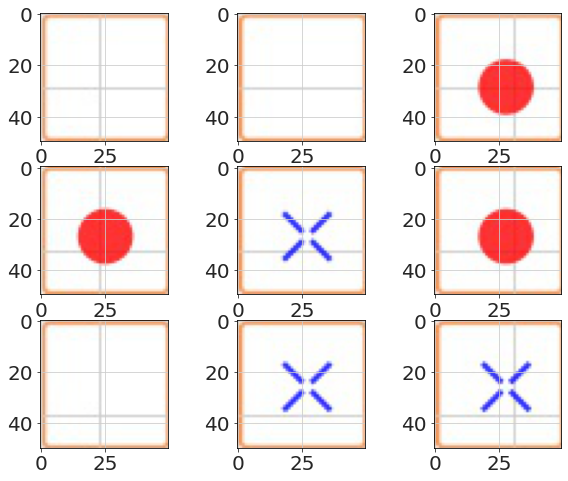

In [38]:
count=1
for r in range(3):
    for c in range(3):
        sub_image=board_square_image(im,r,c)
        
        subplot(3,3,count)
        imshow(sub_image)
        count+=1

In [39]:
from glob import glob

In [40]:
board_pics=glob('images/ttt pics/random board pics/*.jpeg')
print(len(board_pics))

31


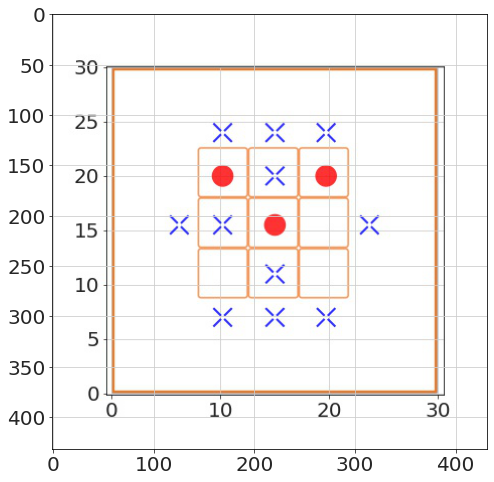

In [41]:
im=imread(random.choice(board_pics))
imshow(im)

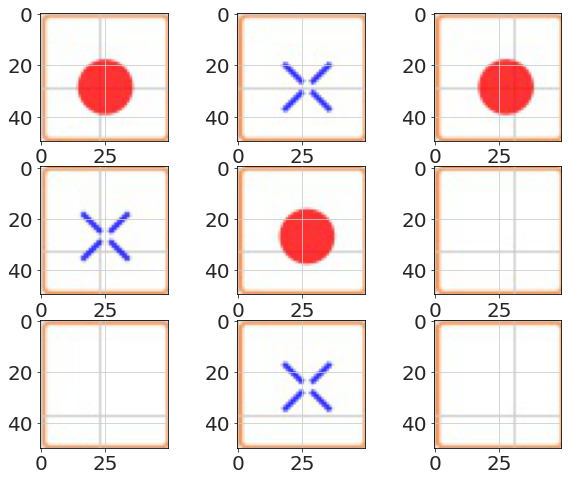

In [42]:
count=1
for r in range(3):
    for c in range(3):
        sub_image=board_square_image(im,r,c)
        
        subplot(3,3,count)
        imshow(sub_image)
        count+=1

## make a folder of sample square images from your board images for "blank", "piece 1" and "piece 2"

I'll reuse the random state board code here.  I don't need to save in different filenames, so redo the take picture too.

In [5]:
def take_picture(t,robot):
    image_filename=f'images/ttt pics/board.jpeg'
    robot.take_picture(image_filename)
    robot.image_filename=image_filename  # save the last name
    
    return True    


state_machine=StateMachine(
    (take_picture,"_end_simulation"),
)
    


In [50]:
folders=[
    'images/ttt pics/training pieces/_',
    'images/ttt pics/training pieces/X',
    'images/ttt pics/training pieces/O',
        ]

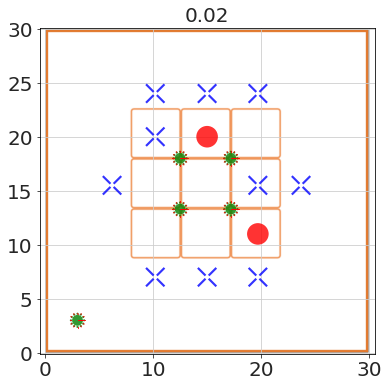

images/ttt pics/training pieces/X/square90.jpeg
images/ttt pics/training pieces/O/square91.jpeg
images/ttt pics/training pieces/_/square92.jpeg
images/ttt pics/training pieces/_/square93.jpeg
images/ttt pics/training pieces/_/square94.jpeg
images/ttt pics/training pieces/X/square95.jpeg
images/ttt pics/training pieces/_/square96.jpeg
images/ttt pics/training pieces/_/square97.jpeg
images/ttt pics/training pieces/O/square98.jpeg


In [57]:
count=0
for i in range(11):
    env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
    robot=Robot(env)
    build(robot)
    robot.controller=Controller(state_machine)
    robot.controller.monitor=monitor

    state=random_TTT_game_state()
    set_up_board(env,state)

    run_sim(env,robot.controller, 
            figure_width=6,
           total_time=100,
           dt_display=0.1,  # make this larger for a faster display
           )

    
    im=imread(robot.image_filename)    
    
    for r in range(3):
        for c in range(3):
            sub_image=board_square_image(im,r,c)
    
    
            if state[r,c]==0:
                filename=f"images/ttt pics/training pieces/_/square{count}.jpeg"
            elif state[r,c]==1:
                filename=f"images/ttt pics/training pieces/X/square{count}.jpeg"
            elif state[r,c]==2:
                filename=f"images/ttt pics/training pieces/O/square{count}.jpeg"
            else:
                raise ValueError("You can't get there from here.")
        
            folder=folders[state[r,c]]
            filename=folder+f"/square{count}.jpeg"
            imsave(filename,sub_image)
            print(filename)
            count+=1
    

## make a harder data set by modifying the squares

In [14]:
def board_square_image(im,r,c,randomize=False):
    if isinstance(im,str):
        im=imread(im)
        
    board_im=im[55:375,65:375]    
    
    
    start_row=77
    start_col=79
    sub_image_rows=50
    sub_image_cols=50

    if randomize:
        offset_r=randint(-20,20)
        offset_c=randint(-20,20)
    else:
        offset_r=0
        offset_c=0
        
    
    
    sub_image=board_im[ (start_row+offset_r+sub_image_rows*r):(start_row+offset_r+sub_image_rows*(r+1)) , 
                  (start_col+offset_c+sub_image_cols*c):(start_col+offset_c+sub_image_cols*(c+1))  ,
                  :]  # all the channels
    
    
    return sub_image

In [16]:
folders=[
    'images/ttt pics/training pieces challenge/_',
    'images/ttt pics/training pieces challenge/X',
    'images/ttt pics/training pieces challenge/O',
        ]

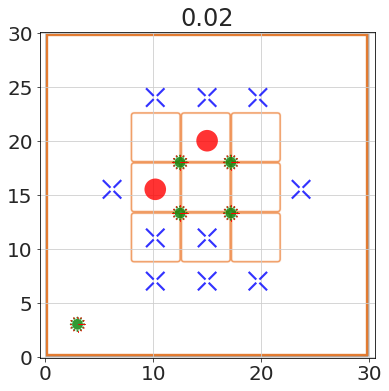

images/ttt pics/training pieces challenge/_/square261.jpeg
images/ttt pics/training pieces challenge/O/square262.jpeg
images/ttt pics/training pieces challenge/_/square263.jpeg
images/ttt pics/training pieces challenge/O/square264.jpeg
images/ttt pics/training pieces challenge/_/square265.jpeg
images/ttt pics/training pieces challenge/_/square266.jpeg
images/ttt pics/training pieces challenge/X/square267.jpeg
images/ttt pics/training pieces challenge/X/square268.jpeg
images/ttt pics/training pieces challenge/_/square269.jpeg


In [17]:
count=0
for i in range(30):
    env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
    robot=Robot(env)
    build(robot)
    robot.controller=Controller(state_machine)
    robot.controller.monitor=monitor

    state=random_TTT_game_state()
    set_up_board(env,state)

    run_sim(env,robot.controller, 
            figure_width=6,
           total_time=100,
           dt_display=0.1,  # make this larger for a faster display
           )

    
    im=imread(robot.image_filename)    
    
    for r in range(3):
        for c in range(3):
            sub_image=board_square_image(im,r,c,randomize=True)
    
            folder=folders[state[r,c]]
            filename=folder+f"/square{count}.jpeg"
            imsave(filename,sub_image)
            print(filename)
            
#             subplot(3,3,count+1)
#             imshow(sub_image)
            count+=1


## run a classification algorithm on your square images to determine what the square contains

In [9]:
from classy import *

Version  1.0.6
Version:  0.0.31


In [10]:
images=image.load_images('images/ttt pics/training pieces')
images=remap_targets(images,new_target_names=['_','X','O'])
summary(images)

[_]: 37 files found
[O]: 31 files found
[X]: 29 files found
Images
97 images of shape (50, 50, 3)
Target values given.
Target names: '_', 'X', 'O'
[_]: 37 files
[X]: 29 files
[O]: 31 files


In [11]:
data=image.images_to_vectors(images)

97 vectors of length 7500
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p7495', 'p7496', 'p7497', 'p7498', 'p7499'  (7500 features)
Target values given.
Target names: '_', 'X', 'O'
Mean:  [255.         236.12371134 177.55670103 ... 234.11340206 174.58762887
 136.7628866 ]
Median:  [255. 237. 181. ... 235. 175. 138.]
Stddev:  [ 0.          4.27473453 16.7301007  ...  3.60662703  3.5486387
  4.40892533]


In [12]:
C=NaiveBayes()
C.fit(data.vectors,data.targets)

### make a random board, slice it, and classify each piece

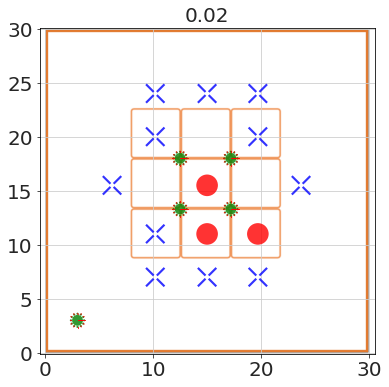

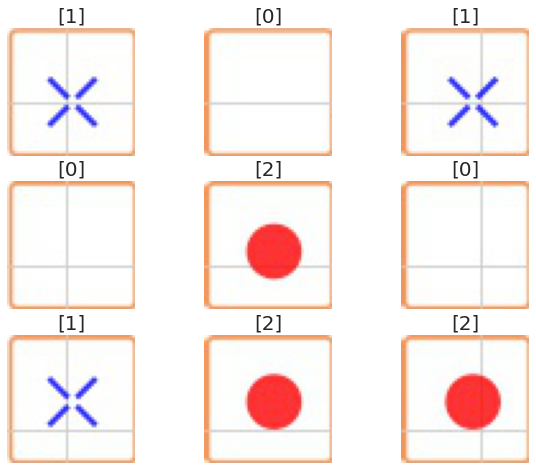

In [15]:
env=FrictionEnvironment(30,30,image='images/Tic Tac Toe Board With Border.png')
robot=Robot(env)
build(robot)
robot.controller=Controller(state_machine)
robot.controller.monitor=monitor

state=random_TTT_game_state()
set_up_board(env,state)

run_sim(env,robot.controller, 
        figure_width=6,
       total_time=100,
       dt_display=0.1,  # make this larger for a faster display
       )


im=imread(robot.image_filename)    

count=1
for r in range(3):
    for c in range(3):
        sub_image=board_square_image(im,r,c)
        vector=atleast_2d(sub_image.ravel())
        prediction=C.predict(vector)
        subplot(3,3,count)
        imshow(sub_image)
        title(prediction)
        axis('off')
        count+=1
